# NYC Taxi Data
#### In this document we will perform basic data cleaning and exploration techniques, covering geospatial and time series data, on the NYC_taxi datasets. The aim is to explore the dataset and make observations. The data used is from the NYC Taxi and Limousine Commission (TLC), which includes pickup time, geo-coordinates, number of passengers, and several other variables for 1.5 million trips between 2016-01-01 and 2016-06-30.  For the analysis we will only use the trining sample 

## Data description
The data contains 11 features with 1458644 rows.

* id - a unique identifier for each trip.
* vendor_id - a code indicating the provider associated with the trip record.
* pickup_datetime - date and time when the meter was engaged.
* dropoff_datetime - date and time when the meter was disengaged.
* passenger_count - the number of passengers in the vehicle (driver entered value).
* pickup_longitude - the longitude where the meter was engaged.
* pickup_latitude - the latitude where the meter was engaged.
* dropoff_longitude - the longitude where the meter was disengaged.
* dropoff_latitude - the latitude where the meter was disengaged/
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip/
* trip_duration - duration of the trip in seconds.

In [1]:
# Imports used in the assigmnent
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import csv
import seaborn as sns

In [2]:
# lodaing the dataset
input_data = pd.read_csv("nyc_taxis.csv")
input_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


## Data cleaning

#### First we look if the are no null values in the data, 
#### We will also check the data representation of each column.
#### We will also use diagrams to detect outliers.

* The datatypes of each column makes sense so we will not change any datatype.

In [3]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


* As seen below the data does not contain null values.

In [4]:
input_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

* We check the distinct values in the *id* column. 
* We see that each value is unique and since the column represents *a unique identifier for each trip* it is redundent we will delete it
* We will use the built-in index column(1st column on the table) to represent unique trips. 

In [5]:
print("Distinct values in id column: ",input_data.id.nunique())
input_data.drop(['id'], axis='columns', inplace=True)

Distinct values in id column:  1458644


* The *vendor_id* contains only 2 values, which means there are 2 providers for recording trips.

In [6]:
input_data.vendor_id.unique()

array([2, 1], dtype=int64)

* The dropoff_datetime and pickup_datetime are represented as expected

In [7]:
input_data[['pickup_datetime','dropoff_datetime']].head()

,pickup_datetime,dropoff_datetime
0,2016-03-14 17:24:55,2016-03-14 17:32:30
1,2016-06-12 00:43:35,2016-06-12 00:54:38
2,2016-01-19 11:35:24,2016-01-19 12:10:48
3,2016-04-06 19:32:31,2016-04-06 19:39:40
4,2016-03-26 13:30:55,2016-03-26 13:38:10


### Lets visualize the passanger count using a box and whisker plot

* A box and whisker plot can easily detect outliers. An outlier is an observation that is numerically distant from the rest of the data, so any point located outside the whiskers is an outlier.
* The number of passanger ranges from 0-8

According to the official uber website (https://www.uber.com/us/en/ride/how-it-works/uber-ride-types/), the uberX can carry up to 4 people and the uberSUV can carry up to 6 people, both without including the driver. All passengers with a number greater than 6 are regarded outliers and are excluded based on domain knowledge and a box-and-whisker plot. We also regard 0 number of passages as an error because it means it was not a ride, so we will delete 0 in passager column. Outliers 5 and 6 will be kept because uberSUV can cater for them. Only 65 rows were removed using the passenger count feature. 

<AxesSubplot:xlabel='passenger_count'>

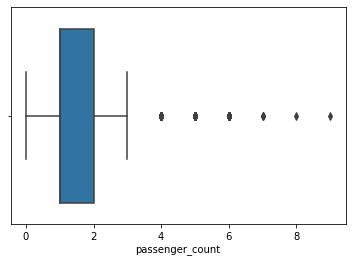

In [8]:
sns.boxplot(x=input_data['passenger_count'])

In [9]:
drop_index = input_data[(input_data.passenger_count==0) | (input_data.passenger_count>6)].index
print("Number passenger count '=0' and '>6' in passanger_count column: ", len(drop_index))
df = input_data.drop(drop_index)

Number passenger count '=0' and '>6' in passanger_count column:  65


### Lets visualize the trip duration, given using log-scale distplot in sns
The durations of the trips are measured in seconds, with some lasting more than 350000 seconds, far longer than others lasting less than 1000 seconds. Such long trips are making all another trip invisible in the histogram on plain scale => We go ahead with the log scale.  The log scale distribution plot in sns will be used to ensure that the trip duration seconds scale to the same numbers with no major gaps between them. As a result, plotting the trip durations on a regular scale won't work, therefore we'll use a log scale instead. 

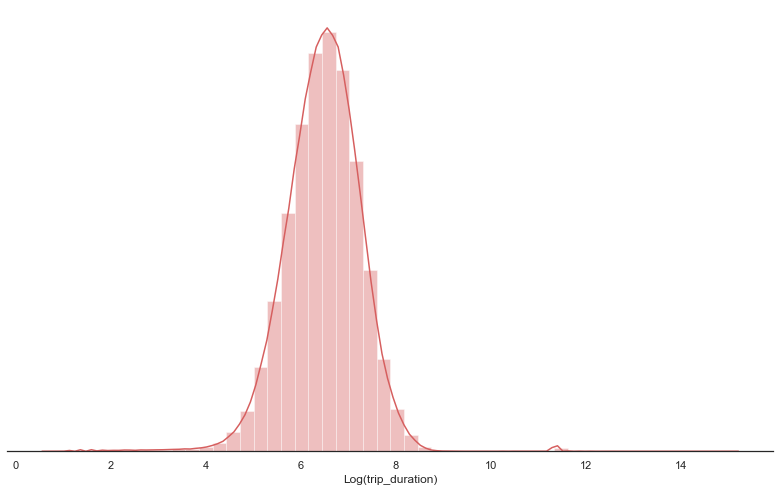

In [10]:
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(df['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [11]:
series = df['trip_duration']
print("minimum time for trip duration: ",min(series))
print("maximum time for trip duration: ",max(series))

minimum time for trip duration:  1
maximum time for trip duration:  3526282


It is clear with the above histogram and kernel density plot that the trip-durations assume a Normal Distrbution and few trips have very large duration, like 3526282 seconds which is approximately 1000 hours (It is safe to make the assumption that these trips are not from the inner city but city to city), while most of the trips are e^4 = 1 minute to e^8 ~ 60 minutes. We will only consider trips that are above 1 minutes, a 1 second trip does not make sense.

In [12]:
index_tripDuration = df[df.trip_duration < 60].index
print("Number of trip durations '< 1 minute' in trip_duration column",len(index_tripDuration))
df.drop(index_tripDuration,inplace=True)

Number of trip durations '< 1 minute' in trip_duration column 8550


### Lets visualize the latitude and longitude coordinates

* The pickup longitude/latitude and dropoff longitude/latitude are represented as expected

In [13]:
df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.982155,40.767937,-73.964630,40.765602
1,-73.980415,40.738564,-73.999481,40.731152
2,-73.979027,40.763939,-74.005333,40.710087
3,-74.010040,40.719971,-74.012268,40.706718
4,-73.973053,40.793209,-73.972923,40.782520


* Consider below where we check the latitude and longitude distributions to have know the coordinates of all trips happening around New York City.

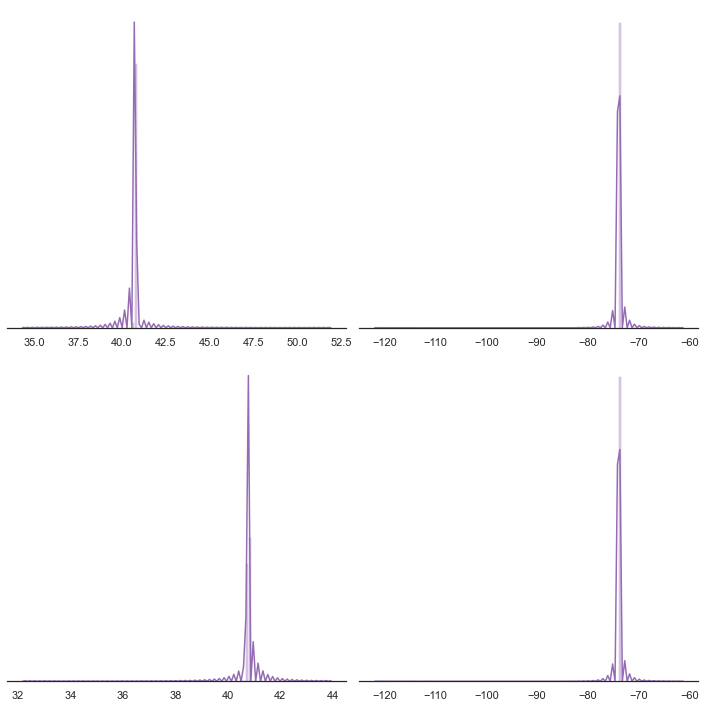

In [14]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="m", bins = 100, ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="m", bins =100, ax=axes[0,1])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="m", bins =100, ax=axes[1, 0])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="m", bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

The latitude and longitude features are used to construct the distribution plots above. The pick and drop latitudes are concentrated about 40 to 41 degrees, while the longitude is around -74 to -73 degrees, as seen in the graphs above. We don't get a histogram-like plot from the plots above, indicating that outliers affect the sns distribution function. Large trips will be eliminated by setting a limit from 40 to 41 degrees latitude and -74 to -73 degrees longitude, respectively.

In [15]:
# Eliminating the outliers using with a lower and upper bound
before_drop = len(df)
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df = df.loc[(df.dropoff_latitude> 40) & (df.dropoff_latitude < 42)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
print(before_drop - len(df))

4303


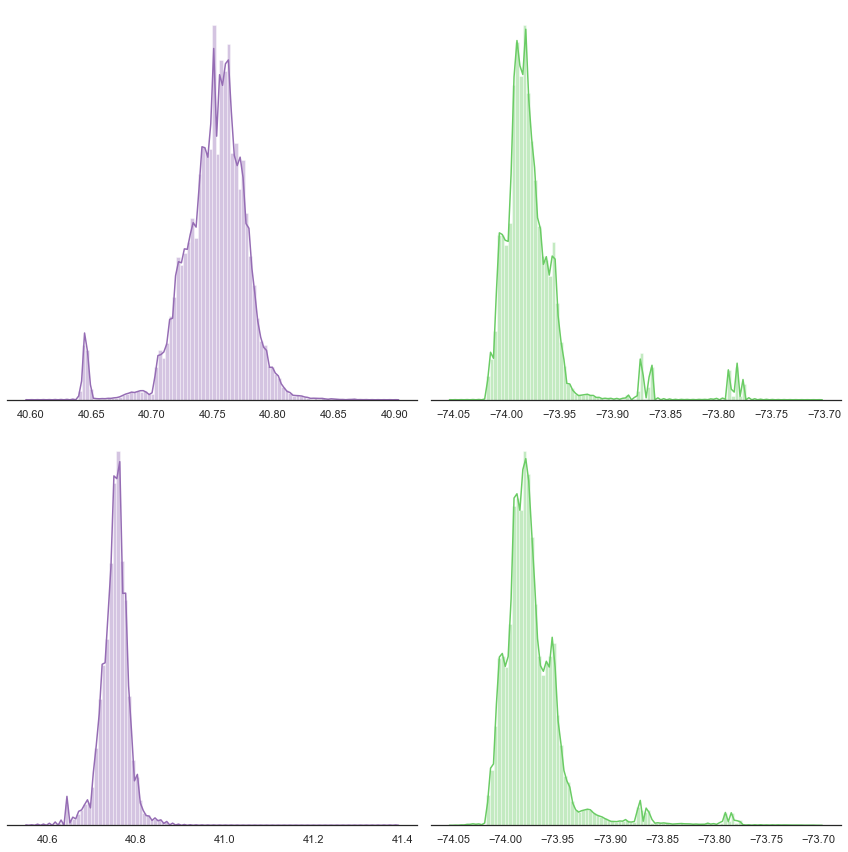

In [16]:
train_data_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(train_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(train_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(train_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(train_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

The latitude pickup and dropoff range have been reduced from 40.6 to 40.9, while the longitude pickup and dropoff range has been reduced from -74.05 to -73.7. This assures that the trips are focused solely on the same place (New York City).

# TODO: Discuss the trip hours. 1 second doenst make sense so does 1000 hours, we only consider New York, that so many hours mean we traveling the entire Earth in a Renault Kwid.
!! I haven't check the section below


# Feature Generation

In [17]:
"""function to calculate haversine distance between two co-ordinates"""
def haversine_(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return(h)

"""function to calculate manhatten distance between pick_drop"""
def manhattan_distance_pd(lat1, lng1, lat2, lng2):
    a = haversine_(lat1, lng1, lat1, lng2)
    b = haversine_(lat1, lng1, lat2, lng1)
    return a + b

In [18]:
# Feature generation

# Distance
train_data_new.loc[:,'distance_of_trip'] = manhattan_distance_pd(train_data_new['pickup_latitude'].values,
                                                             train_data_new['pickup_longitude'].values, 
                                                             train_data_new['dropoff_latitude'].values, 
                                                             train_data_new['dropoff_longitude'].values)

# Day of the week
train_data_new['pickup_datetime'] = pd.to_datetime(train_data_new.pickup_datetime)
train_data_new.loc[:, 'day_of_week'] = train_data_new['pickup_datetime'].dt.dayofweek

# Average speed of the trip
train_data_new['Speed_of_trip'] = ((train_data_new.distance_of_trip/train_data_new.trip_duration)*1000)

train_data_new

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_of_trip,day_of_week,Speed_of_trip
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.735433,0,3.814139
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.430506,6,3.665922
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,8.203575,1,3.862323
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.661331,2,3.872567
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.199457,5,2.757372
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.665895,4,2.141253
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,8.058580,6,12.303176
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,10.645646,4,13.934091
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.521850,1,4.080026


## Time-based questions

### Days of the week plot
According to the bar-graph plot above, day 4 is the most popular day.

<AxesSubplot:>

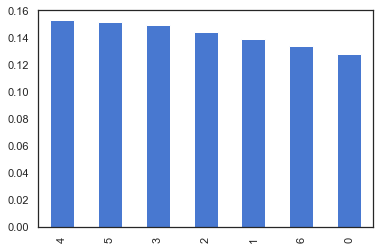

In [19]:
train_data_new['day_of_week'].value_counts(normalize=True).plot.bar()

In [20]:
train_data_new.loc[:, 'hour'] = train_data_new['pickup_datetime'].dt.hour
train_data_new

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_of_trip,day_of_week,Speed_of_trip,hour
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.735433,0,3.814139,17
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.430506,6,3.665922,0
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,8.203575,1,3.862323,11
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.661331,2,3.872567,19
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.199457,5,2.757372,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.665895,4,2.141253,13
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,8.058580,6,12.303176,7
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,10.645646,4,13.934091,6
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.521850,1,4.080026,15


### Hours of the Week plot (for each day of the week)

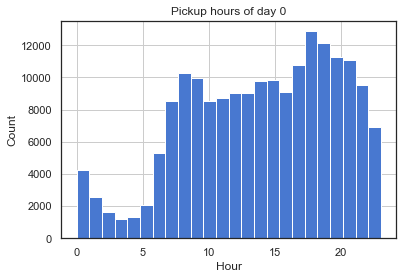

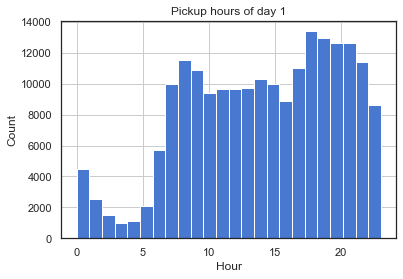

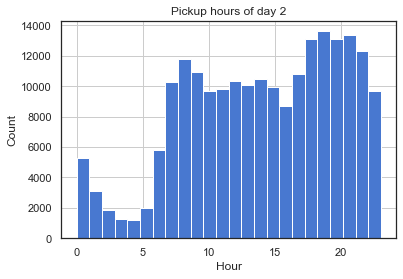

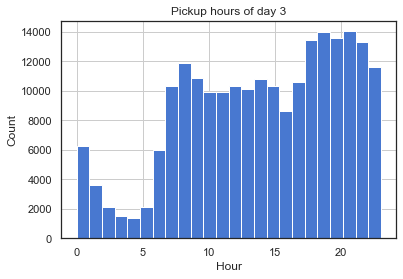

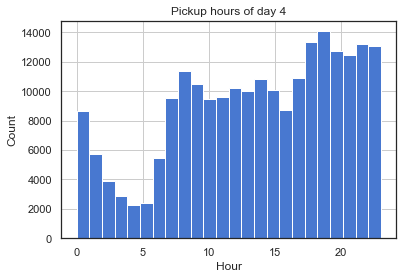

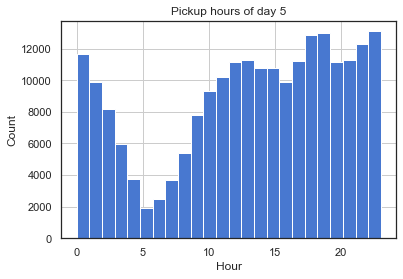

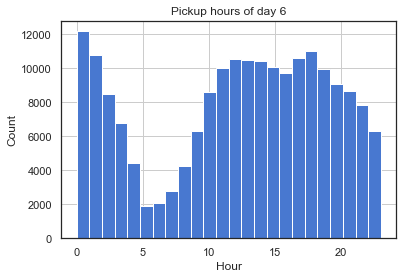

In [21]:
# Plotting pick hours for each day of the week 
import pylab as plt
from pandas import *
gk = train_data_new.groupby('day_of_week')
for i in range(7):
    day = gk.get_group(i)
    day["hour"].hist(bins = 24)
    plt.title("Pickup hours of day " + str(i))
    plt.xlabel("Hour")
    plt.ylabel("Count")
    plt.show()

# I made a big comment in this section, I think we should discus it

We assume the hours are represented as follows, 0-hour till 23-hour from the graph is 00:00 till 23:00. And day-0 till day-6 is Sunday till Saturday. 

* The most popular hour of day 0 is 18. This might be because this is the hour when people come back from visiting thier loved ones or from church. This is Sunday(0).

* The most popular hour of day 1 is 18. This might be because this is the knock off hour of most people. This day is Monday(1).

* The most popular hour of day 2 is 19. This might be because this is the knock off hour of most people. This day is Tuesday(2).

* The most popular hour of day 3 is 21. This might be because this is the knock off hour of most people. This day is Wednesday(3).

* The most popular hour of day 4 is 19. This might be because this is the knock off hour of most people. This day is Thursday(4).

* The most popular hour of day 5 is 23. People always prefer going out for dinner dates after work on Fridays. This day is Friday(5).

* The most popular hour of day 6 is 1. This might be because peaple are coming from night clubbing. This day is Saturday(6). 

### Box-Plots

#### Interpretation
Most popular plots to check the distribution of variables
box covers data from second and third quadrant and rest is shorn by bars
Dots on the both side of bars shows outlier

3526282


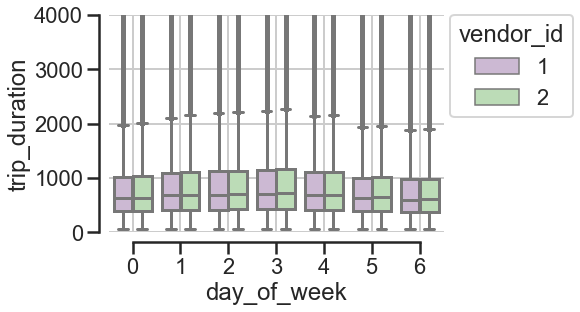

In [22]:
sns.set(style="ticks")
sns.set_context("poster")
sns.boxplot(x="day_of_week", y="trip_duration", hue="vendor_id", data=train_data_new, palette="PRGn")
plt.ylim(0, 4000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = "vendor_id")
plt.grid()
sns.despine(offset=10, trim=True)
print(train_data_new.trip_duration.max())

# I also changed this definition bcs of what I saw on the graph

The boxplot above shows that the average travel duration on Sunday (0) and Saturday (6) (Weekends) is less or equal to 2000 seconds, whereas the average travel trip duration on Weekdays exceeds 2000 seconds, i.e. roughly 33.33 minutes, but it starts to drop from Fridays dusing the weekdays. This might imply that people travel longer distances on weekdays compared to weekends because of the longer duration from the box-plot. Traffic might also be a cause of the longer duration for weekdays. Time taken on Wednesday is greater than rest of the days.

### line-plot
Simple lineplots can explain how the trip duration is changing with time for different days of week.

In [23]:
# !pip install seaborn==0.9.0
# import seaborn as sns

In [24]:
# summary_hour_duration = pd.DataFrame(train_data_new.groupby(['day_of_week','hour'])['trip_duration'].mean())
# summary_hour_duration.reset_index(inplace = True)
# summary_hour_duration['unit']=1
# sns.set(style="white", palette="muted", color_codes=False)
# sns.set_context("poster")
# sns.tsplot(data=summary_hour_duration, time="hour", unit = "unit", condition="day_of_week", value="trip_duration")
# sns.despine(bottom = False)
# plt.legend(bbox_to_anchor=(1.02, 1), loc='right', borderaxespad=0, title = "day_of_week")

# I started on 1.3 Time based questions #4